In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
print(1.0*(0.9999**(3000*9)))

0.06719644000311924


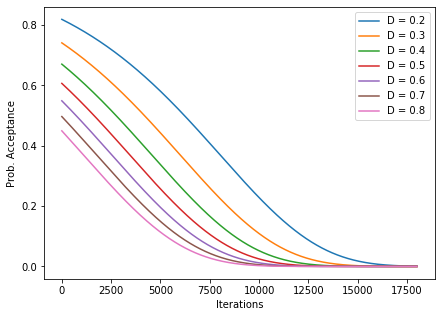

In [42]:
iterations = np.arange(2000*9, dtype=int)
T = 1.0*0.9998**iterations
# T = np.arange(0.01, 1, 0.01)
p_02 = np.exp(- 0.2 / T)
p_03 = np.exp(- 0.3 / T)
p_04 = np.exp(- 0.4 / T)
p_05 = np.exp(- 0.5 / T)
p_06 = np.exp(- 0.6 / T)
p_07 = np.exp(- 0.7 / T)
p_08 = np.exp(- 0.8 / T)

plt.figure(figsize=(7,5))
plt.plot(iterations, p_02, label='D = 0.2')
plt.plot(iterations, p_03, label='D = 0.3')
plt.plot(iterations, p_04, label='D = 0.4')
plt.plot(iterations, p_05, label='D = 0.5')
plt.plot(iterations, p_06, label='D = 0.6')
plt.plot(iterations, p_07, label='D = 0.7')
plt.plot(iterations, p_08, label='D = 0.8')
plt.xlabel('Iterations')
plt.ylabel('Prob. Acceptance')
plt.legend()
plt.show()

In [11]:
print(np.exp(- 0.4 / 3))

0.8751733190429475


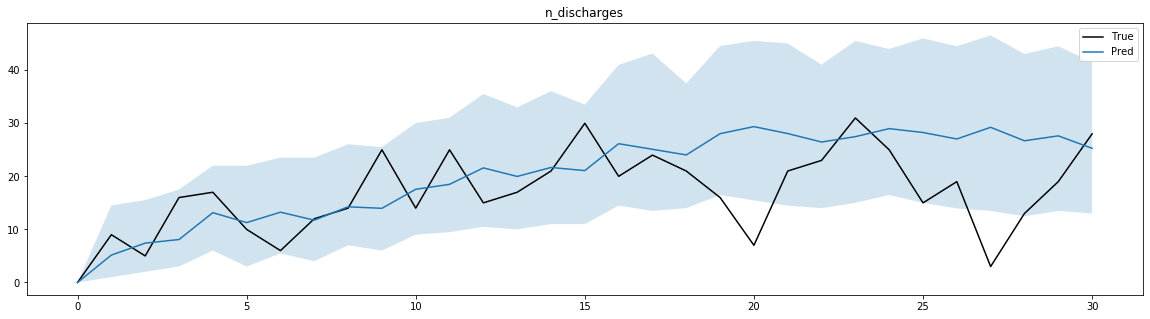

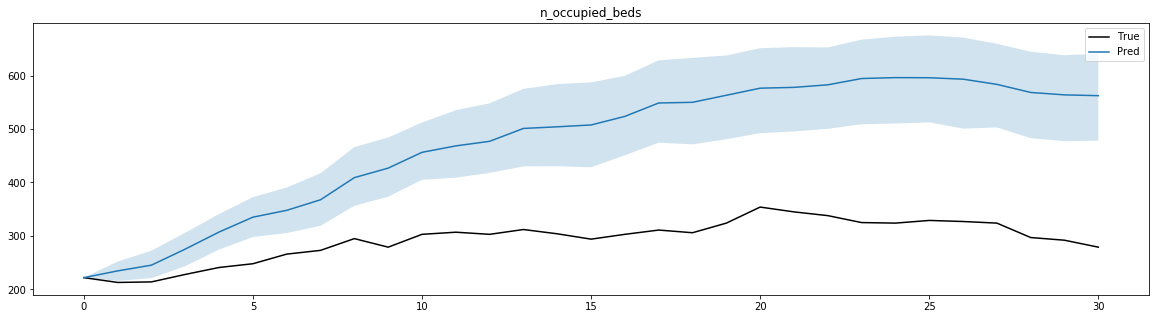

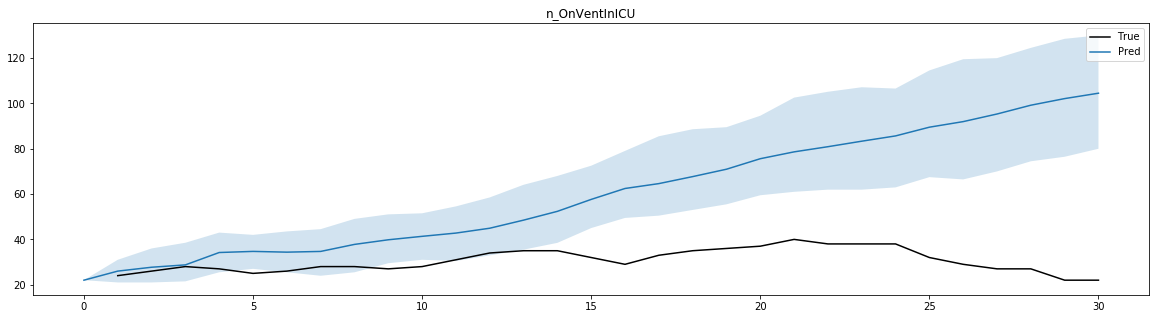

In [37]:
def compute_true_summary_statistics(csv_df, expected_columns, include_vent_in_allbeds=True):
    new_dict = {}

    for column in expected_columns:
        if column == 'timestep' or column == 'dates' or column == 'n_admits':
            continue
        elif column == 'n_discharges':
            new_dict[column] = csv_df['n_discharged_InGeneralWard'] + csv_df['n_discharged_OffVentInICU'] + csv_df['n_discharged_OnVentInICU']
        elif column == 'n_occupied_beds':
            new_dict[column] = csv_df['n_InGeneralWard'] + csv_df['n_OffVentInICU']
            if include_vent_in_allbeds:
                new_dict[column] += csv_df['n_OnVentInICU']
        else:
            new_dict[column] = csv_df[column]

    return pd.DataFrame(new_dict)

expected_columns = ['n_discharges', 'n_occupied_beds', 'n_OnVentInICU']

# South_Tees_Hospitals_NHS_Foundation_Trust
# university_hospitals_birmingham_nhs_foundation_trust
# university_hospitals_of_north_midlands_nhs_trust
# manchester_university_nhs_foundation_trust

hospital = "university_hospitals_of_north_midlands_nhs_trust"
test = "Testing"

true_df = pd.read_csv('NHS_data/new_data/formatted_data/%s_%s.csv' % (hospital, test))
upper_df = compute_true_summary_statistics(pd.read_csv('NHS_output/summary_%s_TrainingOn%s_20MaxEach_uniform_percentile=097.50.csv' % (hospital, test)), expected_columns)
pred_df = compute_true_summary_statistics(pd.read_csv('NHS_output/summary_%s_TrainingOn%s_20MaxEach_uniform_mean.csv' % (hospital, test)), expected_columns)
lower_df = compute_true_summary_statistics(pd.read_csv('NHS_output/summary_%s_TrainingOn%s_20MaxEach_uniform_percentile=002.50.csv' % (hospital, test)), expected_columns)

for column in expected_columns:
    try:
        timesteps = np.arange(true_df[column].shape[0], dtype=int)
    except KeyError:
        continue
    plt.figure(figsize=(20,5))
    plt.plot(timesteps, true_df[column], label='True', color='k')
    plt.plot(timesteps, pred_df[column], label='Pred')
    plt.fill_between(timesteps, lower_df[column], upper_df[column], alpha=0.2)
    plt.title(column)
    plt.legend()
    plt.show()

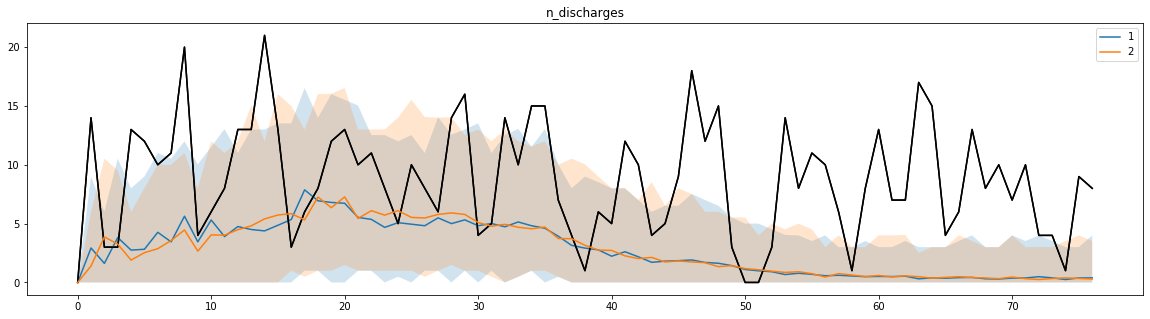

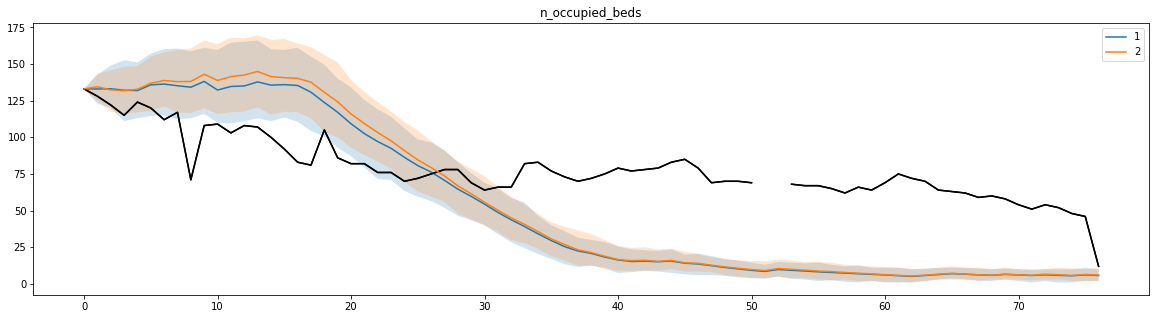

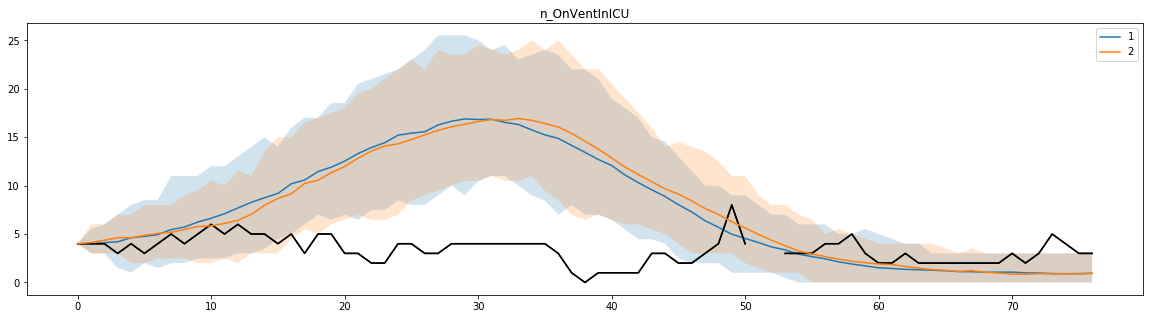

In [11]:
def compute_true_summary_statistics(csv_df, expected_columns):
    new_dict = {}

    for column in expected_columns:
        if column == 'timestep' or column == 'dates' or column == 'n_admits':
            continue
        elif column == 'n_discharges':
            new_dict[column] = csv_df['n_discharged_InGeneralWard'] + csv_df['n_discharged_OffVentInICU'] + csv_df['n_discharged_OnVentInICU']
        elif column == 'n_occupied_beds':
            new_dict[column] = csv_df['n_InGeneralWard'] + csv_df['n_OffVentInICU']# + csv_df['n_OnVentInICU'] # uncomment last one for AllBeds
        else:
            new_dict[column] = csv_df[column]

    return pd.DataFrame(new_dict)

expected_columns = ['n_discharges', 'n_occupied_beds', 'n_OnVentInICU']

true_df = pd.read_csv('NHS_data/new_data/formatted_data/south_tees_hospitals_nhs_foundation_trust_Testing.csv')

filenames = ['NHS_output/summary_south_tees_hospitals_nhs_foundation_trust_TrainingOnTesting_20MaxEach_uniform_', 'NHS_output/summary_University_Hospitals_Birmingham_NHS_Foundation_Trust_2_FirstHalfOnSecondHalf_20MaxEach_uniform_']

for column in expected_columns:
    timesteps = np.arange(true_df[column].shape[0], dtype=int)
    plt.figure(figsize=(20,5))
    for i, filename in enumerate(filenames):
        plt.plot(timesteps, true_df[column], color='k')
        plt.plot(timesteps, compute_true_summary_statistics(pd.read_csv(filename + 'mean.csv'), expected_columns)[column], label=i+1)
        plt.fill_between(timesteps, compute_true_summary_statistics(pd.read_csv(filename + 'percentile=002.50.csv'), expected_columns)[column], compute_true_summary_statistics(pd.read_csv(filename + 'percentile=097.50.csv'), expected_columns)[column], alpha=0.2)
        plt.title(column)
    plt.legend()
    plt.show()

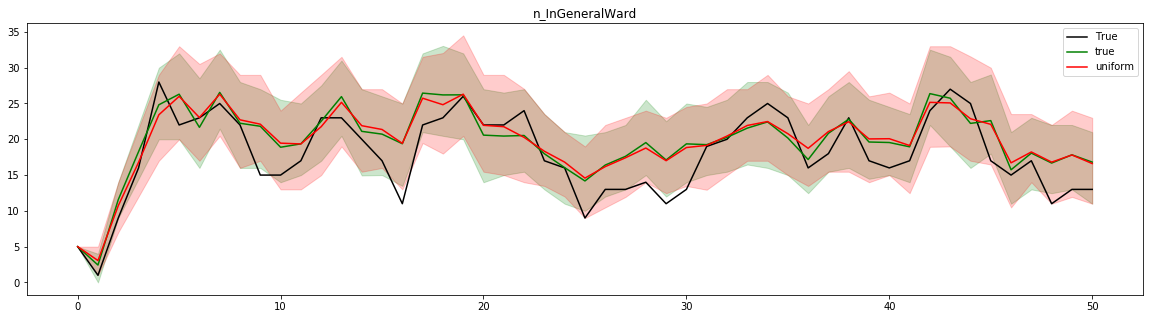

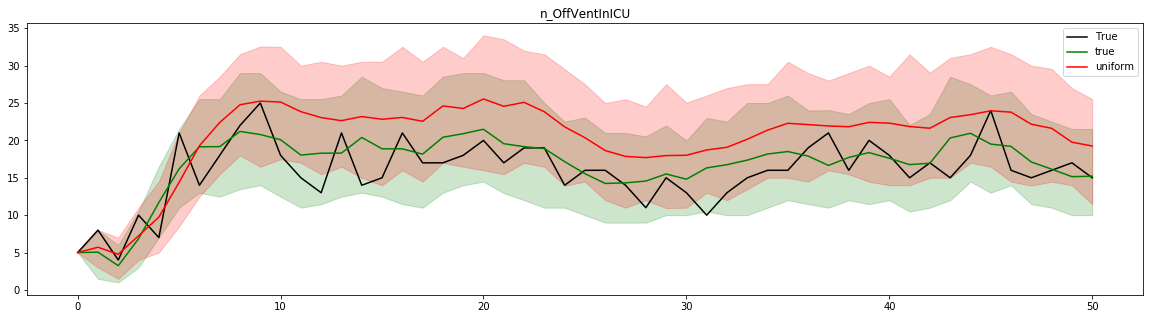

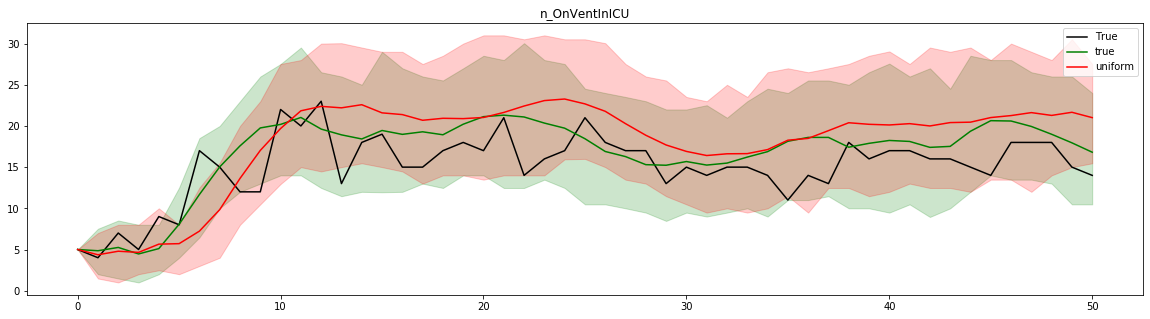

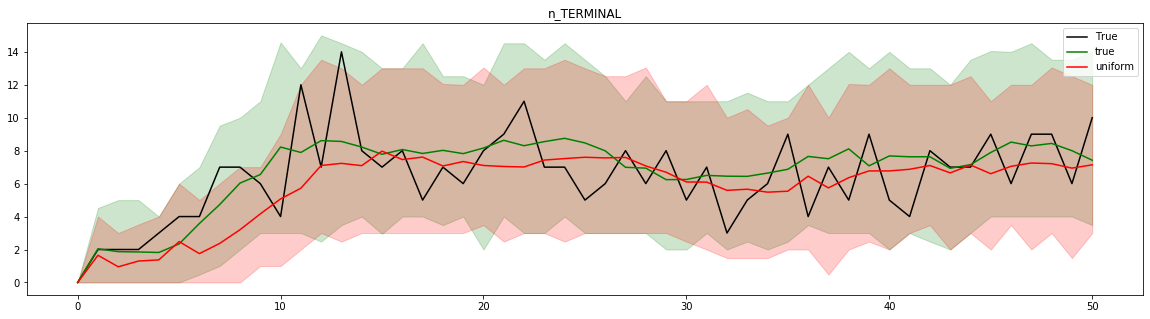

In [11]:
color_map = {'good': 'b', 'good_flat': 'purple', 'good_spiked': 'cyan', 'good2': 'brown', 'true': 'g', 'uniform': 'r', 'centered': 'orange'}
columns = ['n_InGeneralWard', 'n_OffVentInICU', 'n_OnVentInICU', 'n_TERMINAL'] #, 'n_discharged_InGeneralWard', 'n_discharged_OffVentInICU', 'n_discharged_OnVentInICU']

priors = ['true', 'uniform']
experiment = '100-10'
test = '50-10'
true_df = pd.read_csv('example_output/results_test_%s.csv' % test)

for column in columns:
    timesteps = np.arange(51, dtype=int)
    plt.figure(figsize=(20,5))
    plt.plot(timesteps, true_df[column], label='True', color='k')
    for prior in priors:
        upper_df = pd.read_csv('test_output/summary_%s_%s_%s_percentile=097.50.csv' % (prior, experiment, test))
        pred_df = pd.read_csv('test_output/summary_%s_%s_%s_mean.csv' % (prior, experiment, test))
        lower_df = pd.read_csv('test_output/summary_%s_%s_%s_percentile=002.50.csv' % (prior, experiment, test))
        
        plt.plot(timesteps, pred_df[column], label=prior, color=color_map[prior])
        plt.fill_between(timesteps, lower_df[column], upper_df[column], color=color_map[prior], alpha=0.2)
    plt.title(column)
    plt.legend()
    plt.show()

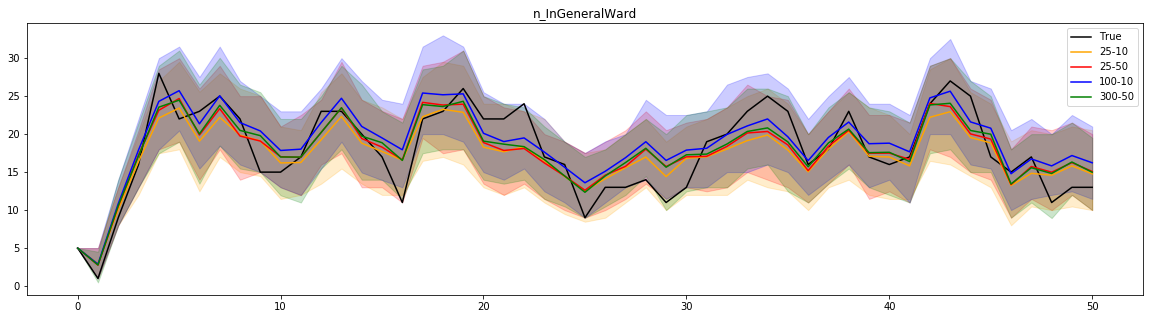

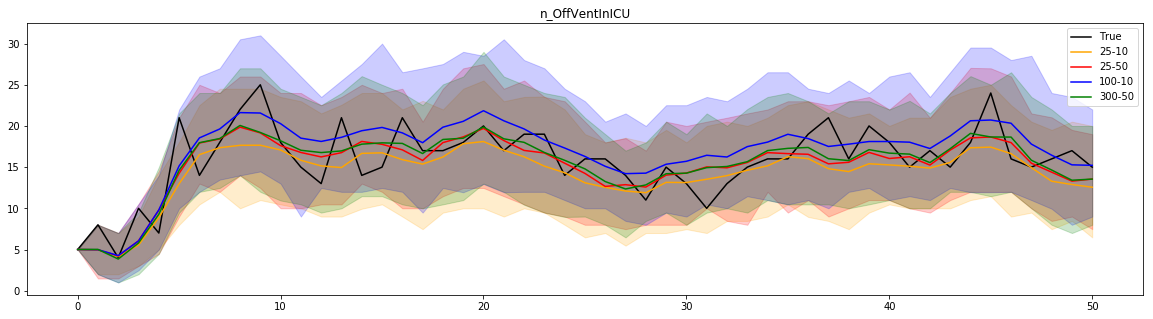

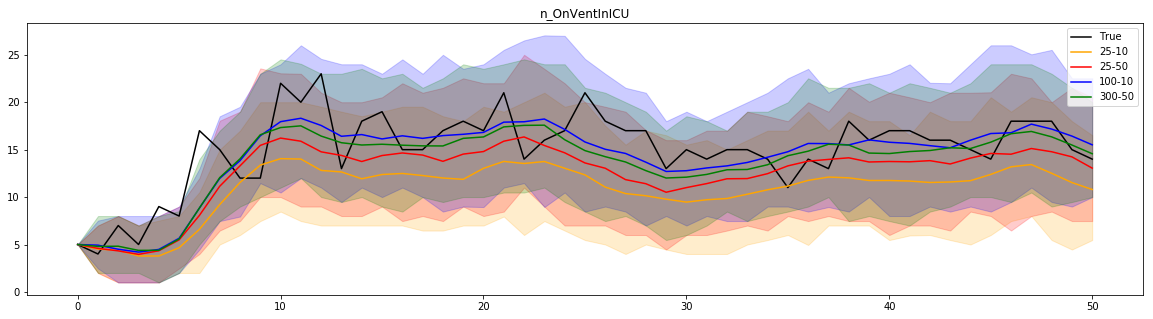

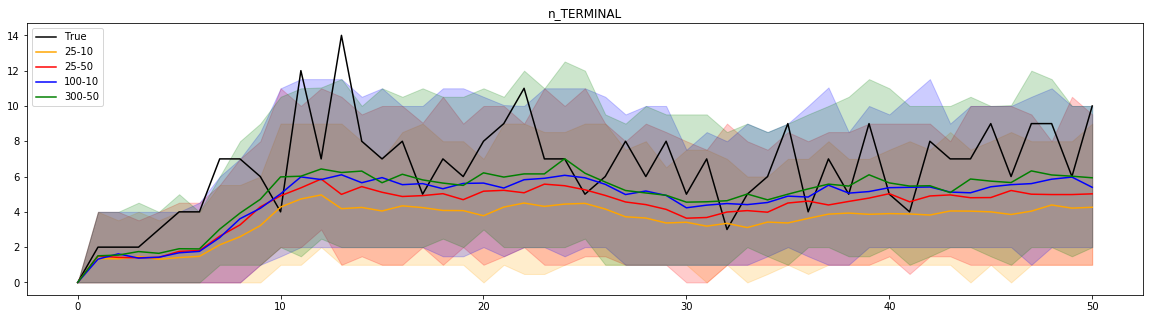

In [91]:
color_map = {'100-10': 'b', '300-50': 'g', '25-50': 'r', '25-10': 'orange'}
columns = ['n_InGeneralWard', 'n_OffVentInICU', 'n_OnVentInICU', 'n_TERMINAL'] #, 'n_discharged_InGeneralWard', 'n_discharged_OffVentInICU', 'n_discharged_OnVentInICU']

prior = 'good'
experiments = ['25-10', '25-50', '100-10', '300-50']
test = '50-10'
true_df = pd.read_csv('example_output/results_test_%s.csv' % test)

for column in columns:
    timesteps = np.arange(51, dtype=int)
    plt.figure(figsize=(20,5))
    plt.plot(timesteps, true_df[column], label='True', color='k')
    for experiment in experiments:
        upper_df = pd.read_csv('test_output/summary_%s_%s_%s_percentile=097.50.csv' % (prior, experiment, test))
        pred_df = pd.read_csv('test_output/summary_%s_%s_%s_mean.csv' % (prior, experiment, test))
        lower_df = pd.read_csv('test_output/summary_%s_%s_%s_percentile=002.50.csv' % (prior, experiment, test))
        
        plt.plot(timesteps, pred_df[column], label=experiment, color=color_map[experiment])
        plt.fill_between(timesteps, lower_df[column], upper_df[column], color=color_map[experiment], alpha=0.2)
    plt.title(column)
    plt.legend()
    plt.show()